<a href="https://colab.research.google.com/github/yamsunar089/YAMcn6005_portfolio/blob/main/w6_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, I learned how to use K-Means clustering to group diabetes data without using class labels. First, I loaded the dataset and used the features (except the Outcome column) to understand how clustering works with real health data.

I then focused on Glucose and BMI to make the clusters easier to visualise. I used the Elbow Method to help choose a good number of clusters and selected 3 clusters. After training K-Means, I added the cluster labels to the dataframe and checked the size of each cluster to see how the data was distributed.

To evaluate the clustering quality, I calculated the silhouette score, which helped me understand whether the clusters were well separated. I also plotted a scatter graph showing the clusters and the centroids, which made the result easier to interpret.

Finally, I tested the model using new data points and predicted which cluster they belong to. This helped me understand that new input must have the same features (Glucose and BMI) as the training data.

Overall, this lab improved my understanding of unsupervised learning, cluster evaluation, and interpreting clusters using graphs.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('diabetesN (3).csv')
df.head()

# Use all features except Outcome for clustering
X = df.drop('Outcome', axis=1)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Add cluster labels
df['Cluster'] = kmeans.labels_

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0


In [ ]:
df.info()

# Select any two columns for clustering
X = df['Glucose']
Y = df['BMI']

import numpy as np
data = np.array(list(zip(X, Y)))
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Cluster                   768 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 57.1 KB


array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

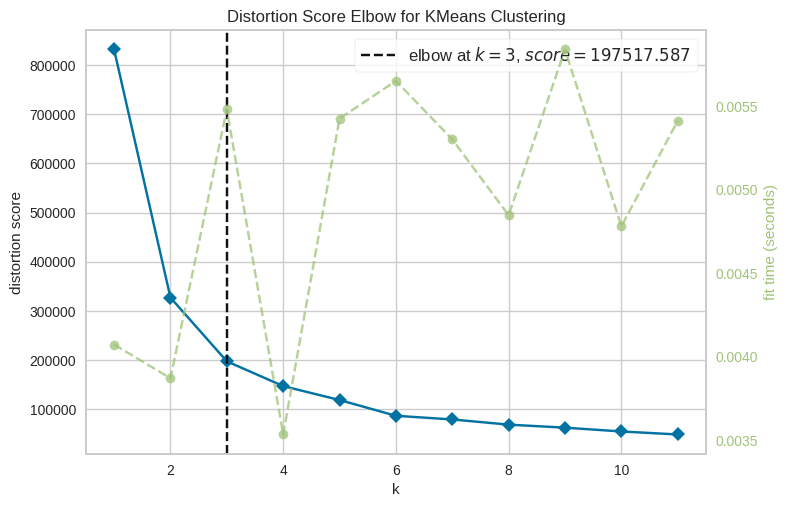

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Load your dataset
df = pd.read_csv('diabetesN (3).csv')

# Select two numerical columns from your dataset
X = df[['Glucose', 'BMI']]

# K-Means elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)      # Fit the data to the visualizer
visualizer.show()      # Show the plot

In [ ]:
from sklearn.cluster import KMeans

# Select two columns from your diabetes dataset
xx = df[['Glucose', 'BMI']]

# Apply K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)


In [ ]:
kmeans.labels_


array([2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2,
       1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1,

In [ ]:
# We assign the labels to each row in dataframe.
df["Clus_km"] = kmeans.labels_

df.head(15)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Clus_km
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2
5,5,116,74,0,0,25.6,0.201,30,0,2
6,3,78,50,32,88,31.0,0.248,26,1,0
7,10,115,0,0,0,35.3,0.134,29,0,2
8,2,197,70,45,543,30.5,0.158,53,1,1
9,8,125,96,0,0,0.0,0.232,54,1,2


In [ ]:
kmeans.cluster_centers_

array([[ 92.01597444,  30.18658147],
       [171.03496503,  35.16713287],
       [126.88461538,  32.34935897]])

In [ ]:
#Get each cluster size,
from collections import Counter
Counter(kmeans.labels_)

Counter({np.int32(2): 312, np.int32(0): 313, np.int32(1): 143})

In [ ]:
from sklearn import metrics
clusters = kmeans.labels_.tolist()

ClusterCentroid=kmeans.cluster_centers_
clustervalidation=metrics.silhouette_score(xx,clusters, metric='euclidean')
print(clustervalidation)

0.4586523405146536


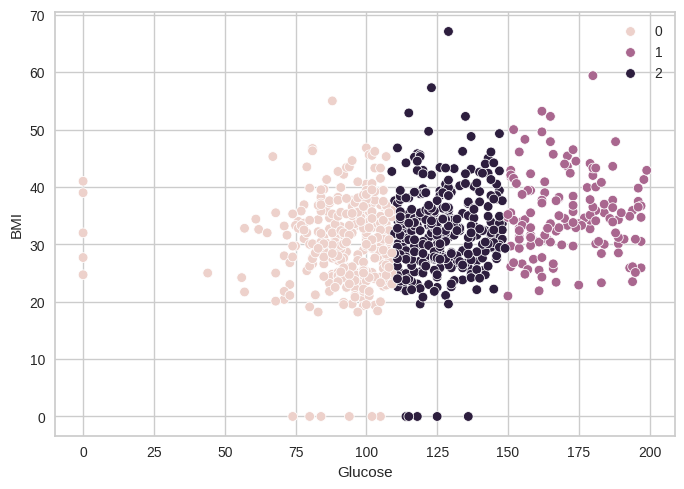

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=xx, x="Glucose", y="BMI", hue=kmeans.labels_)
plt.show()

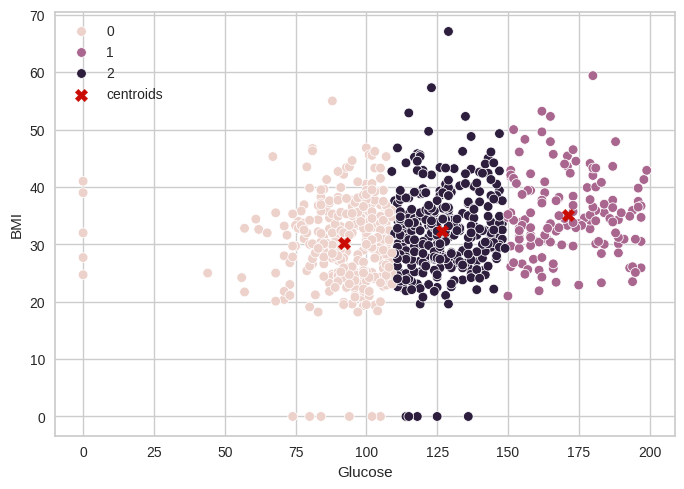

In [ ]:
sns.scatterplot(data=xx, x="Glucose", y="BMI", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
# New data must match the features used for training: Glucose and BMI
newdata = [[85, 33.2], [100, 27.5], [150, 40.1], [110, 25.0]]

d = pd.DataFrame(newdata, columns=['Glucose', 'BMI'])

predictedClusters = kmeans.predict(d)

print(len(predictedClusters))
print(d)
print(predictedClusters)


4
   Glucose   BMI
0       85  33.2
1      100  27.5
2      150  40.1
3      110  25.0
[0 0 1 2]
